In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/heart_disease_scaled.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,0
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,1
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,1
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,0
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,0


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
pca = PCA()
X_pca = PCA().fit_transform(X)
pca.fit(X)

PCA()

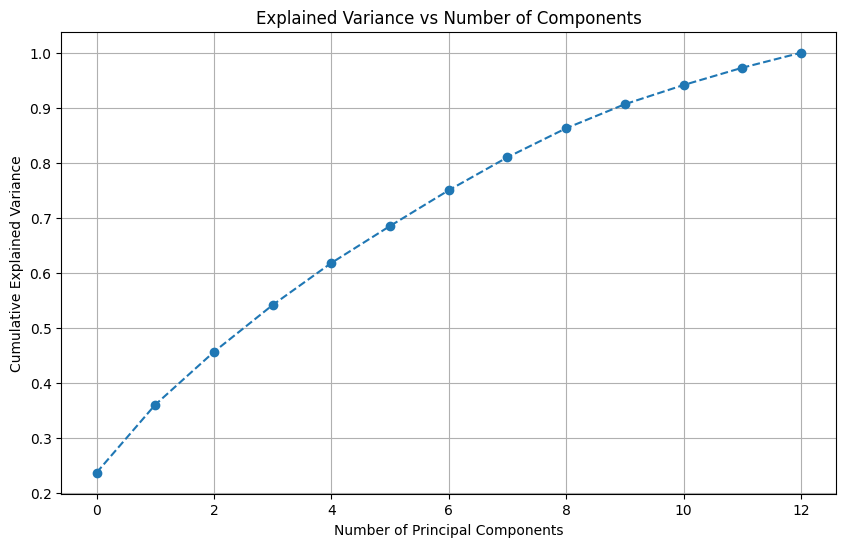

In [8]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()


We will keep 10 PCs

In [9]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)


In [10]:
# Save X_reduced as a DataFrame called df_red and merge y with it
df_red1 = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
df_red1['target'] = y.values
df_red1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,1.130664,-1.087655,3.164263,2.293052,0.023175,0.578814,0.664854,-0.536787,-1.495392,-0.499485,0
1,3.190926,-1.417885,-0.533715,-0.857970,-0.006289,0.745347,-0.259063,1.069777,0.342524,1.431509,1
2,3.124339,0.657008,-0.285134,-0.626641,0.152793,1.130179,-0.324995,0.209299,0.043205,0.462304,1
3,-0.484339,1.410972,0.397806,2.832741,0.721309,-0.388361,-0.522221,-2.153525,0.760079,0.228379,0
4,-2.284542,-0.330033,-0.072260,1.209318,0.770835,0.625587,0.379567,0.014736,1.050381,0.628110,0


In [12]:
df_red1.to_csv('../data/heart_disease_pcs.csv', index=False)